In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
title = pd.read_csv('/Users/hgardner/Desktop/toxicity/title_scores.csv')

## Title Analysis

In [4]:
#checking for duplicates
print('title shape', title.shape)
#duplicates?
title = title.drop_duplicates()
print('de-dupped title shape', title.shape)

title shape (5725631, 3)
de-dupped title shape (5570537, 3)


In [5]:
#summary Statistics
title.describe()

,score
count,5.570537e+06
mean,5.084002e-03
std,4.134584e-02
min,9.022290e-05
25%,2.536507e-04
50%,3.478588e-04
75%,5.836900e-04
max,9.952282e-01


In [6]:
#mean
print('title score mean:', title['score'].mean())

title score mean: 0.0050840024627873


In [7]:
title = title.sort_values(by="score", ascending=False)
toptentitle = title.head(10)

In [8]:
toptentitle.to_csv('toptentitle.csv', index=False)

In [9]:
#dividing data into 4 categorical levels
title['score_cat'] = pd.cut(title['score'], bins=[0, .25, .5, .75, 1], labels=['Under .25', '.25-.4999', '.5-.7499', '.75-1'])
freq_table = pd.crosstab(index=title['score_cat'], columns='count')
freq_table.reset_index(inplace=True)
freq_table = freq_table.rename(columns = {'index':'score_cat'})

In [10]:
freq_table.head()

freq_table['percent_total'] = (freq_table['count']/5570537)*100

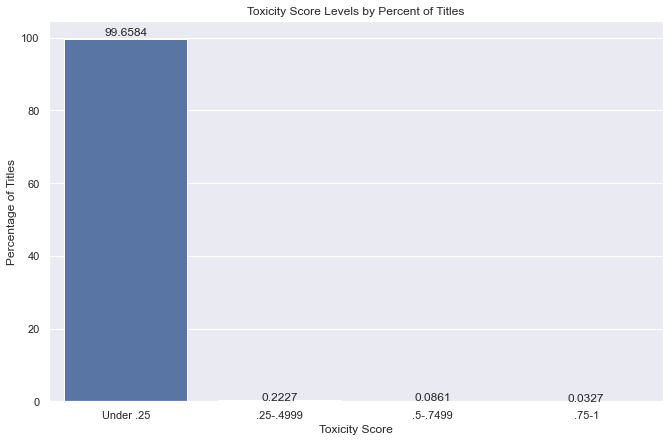

In [128]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

p = sns.barplot(x="score_cat", y="percent_total", data=freq_table)
p.set(xlabel='Toxicity Score', ylabel='Percentage of Titles')
p.set(title='Toxicity Score Levels by Percent of Titles')
sns.set(rc={'figure.figsize':(11,7)})
show_values(p)


In [12]:
tox_t = title.loc[title['score'] >= .25]

In [13]:
tox_t.shape

(28096, 4)

(0.0, 2436.0)

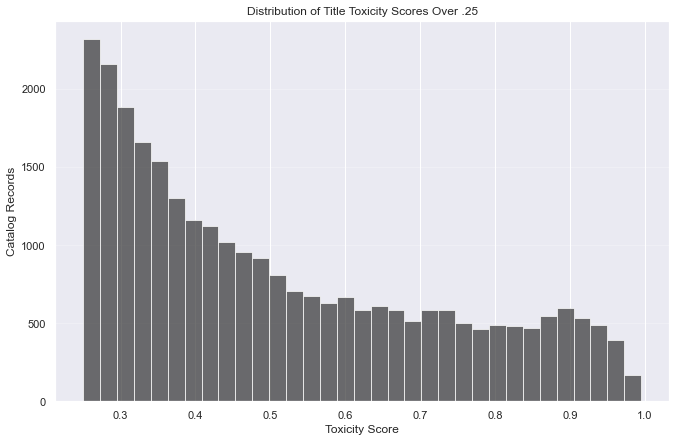

In [126]:
#title histogram
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=tox_t['score'], bins='auto', color='#333333',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.25)
plt.xlabel('Toxicity Score')
plt.ylabel('Catalog Records')
plt.title('Distribution of Title Toxicity Scores Over .25')
# Set a clean upper y-axis limit.
plt.ylim()


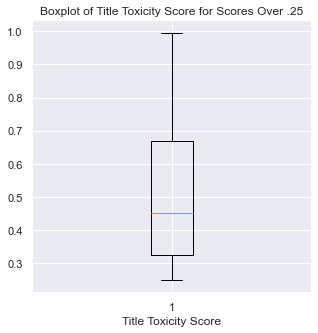

In [125]:
#title score box plot
plt.figure(figsize=(5,5))
plt.boxplot(tox_t['score'])
plt.xlabel('Title Toxicity Score')
plt.title('Boxplot of Title Toxicity Score for Scores Over .25')
plt.show()

In [16]:
tox_t['score'].mean()

0.5098808339631997

In [17]:
tox_t['score'].max()

0.9952282

In [18]:
tox_t['score'].min()

0.25000012

In [19]:
tox_t.to_csv('tox_t.csv')

### Subset analysis

In [100]:
#m2 datasets
final_title = pd.read_csv('/Users/hgardner/Desktop/toxicity/title_subset_scores.csv')


In [101]:
final_title.describe()

,score,severe_toxicity,identity_attack,insult,obscene,threat
count,28263.000000,28263.000000,28263.000000,28263.000000,28263.000000,28263.000000
mean,0.509725,0.003743,0.074934,0.117033,0.092219,0.015743
std,0.211363,0.006558,0.146902,0.154644,0.157731,0.078146
min,0.250000,0.000017,0.000080,0.000150,0.000105,0.000027
25%,0.326345,0.000915,0.004077,0.024557,0.013100,0.000859
50%,0.450544,0.002162,0.009206,0.052377,0.038276,0.001619
75%,0.670208,0.004534,0.048030,0.141558,0.085388,0.003203
max,0.995228,0.270478,0.965268,0.966125,0.988001,0.944792


In [102]:
final_title.head(10)

,bibid,title_x,score,severe_toxicity,identity_attack,insult,obscene,threat
0,(OCoLC)1110021888,"Witches, Sluts, Feminists :",0.995228,0.196947,0.373013,0.774106,0.888815,0.007080
1,(CKB)4100000008484946,¿Es tu jefe un gilipollas?.,0.995107,0.028311,0.043871,0.110282,0.126094,0.002827
2,(OCoLC)ocm34699730,"La parra, la perra y la porra /",0.994347,0.032834,0.021234,0.082941,0.107072,0.005126
3,(OCoLC)760279912,"Witches, wife beaters, and whores :",0.993724,0.053704,0.053442,0.304931,0.478658,0.003060
4,(OCoLC)ocn708243813,"Witches, wife beaters, and whores :",0.993724,0.053704,0.053442,0.304931,0.478658,0.003060
5,(YBPDDA)ebc869075,Why are faggots so afraid of faggots? :,0.993689,0.084071,0.962910,0.924434,0.891947,0.013831
6,(OCoLC)ocn232648188,"Duck, you sucker",0.993178,0.079754,0.022665,0.927610,0.944253,0.008323
7,(OCoLC)ocm30835997,"Wild Dick, the Indian slayer ...",0.992767,0.141919,0.372618,0.644148,0.938744,0.023427
8,(OCoLC)ocn953830144,Stupid fucking bird :,0.992248,0.134735,0.209096,0.958942,0.973033,0.014662
9,(MiAaPQ)EBC869075,Why are faggots so afraid of faggots?,0.992063,0.070818,0.964140,0.927835,0.889551,0.014365


In [103]:
final_title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28263 entries, 0 to 28262
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   bibid            28263 non-null  object 
 1   title_x          28263 non-null  object 
 2   score            28263 non-null  float64
 3   severe_toxicity  28263 non-null  float64
 4   identity_attack  28263 non-null  float64
 5   insult           28263 non-null  float64
 6   obscene          28263 non-null  float64
 7   threat           28263 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.7+ MB


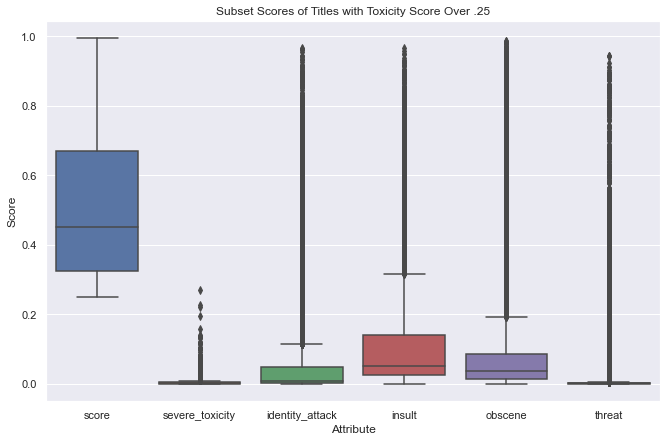

In [104]:
ax = sns.boxplot(data=final_title)
ax.set(xlabel='Attribute', ylabel='Score')
ax.set(title='Subset Scores of Titles with Toxicity Score Over .25')
sns.set(rc={'figure.figsize':(11,7)})
sns.set(font_scale=1)


## Description Analysis

In [109]:
desc = pd.read_csv('/Users/hgardner/Desktop/toxicity/desc_scores.csv')

In [110]:
#checking for duplicates
print('desc shape', desc.shape)
#duplicates?
desc = desc.drop_duplicates()
print('de-dupped desc shape', desc.shape)

desc shape (721454, 3)
de-dupped desc shape (715188, 3)


In [111]:
#summary Statistics
desc.describe()

,score
count,715188.000000
mean,0.003691
std,0.031149
min,0.000093
25%,0.000257
50%,0.000337
75%,0.000477
max,0.983634


In [108]:
desc['score'].mean()

0.45609681871165864

In [112]:
desc = desc.sort_values(by="score", ascending=False)
toptendesc = desc.head(10)

In [113]:
#dividing data into 4 categorical levels
desc['score_cat'] = pd.cut(desc['score'], bins=[0, .25, .5, .75, 1], labels=['Under .25', '.25-.4999', '.5-.7499', '.75-1'])
freq_table = pd.crosstab(index=desc['score_cat'], columns='count')
freq_table.reset_index(inplace=True)
freq_table = freq_table.rename(columns = {'index':'score_cat'})

In [114]:
freq_table['percent_total'] = (freq_table['count']/715188)*100

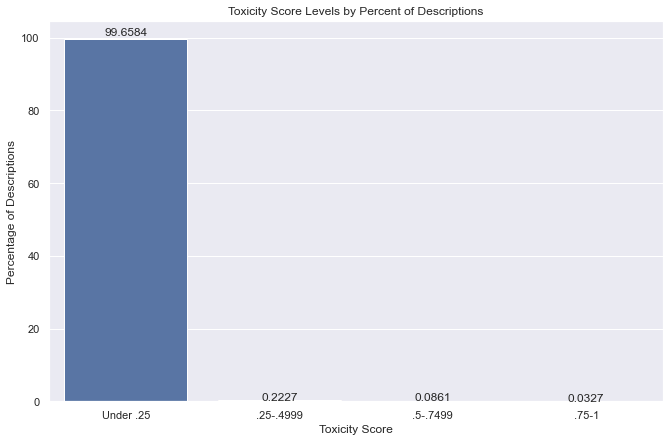

In [129]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.4f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.4f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

p = sns.barplot(x="score_cat", y="percent_total", data=freq_table)
p.set(xlabel='Toxicity Score', ylabel='Percentage of Descriptions')
p.set(title='Toxicity Score Levels by Percent of Descriptions')
sns.set(rc={'figure.figsize':(11,7)})
show_values(p)


In [116]:
tox_d = desc.loc[desc['score'] >= .25]

In [117]:
tox_d.shape

(2443, 4)

(0.0, 604.8)

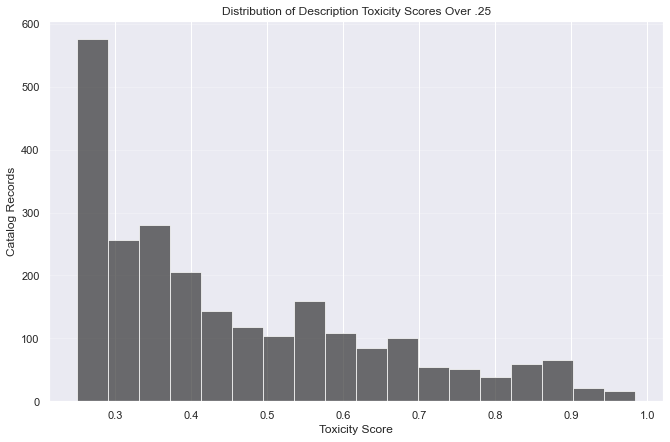

In [118]:
#desc histogram
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=tox_d['score'], bins='auto', color='#333333',
                            alpha=0.7, rwidth=1)
plt.grid(axis='y', alpha=0.25)
plt.xlabel('Toxicity Score')
plt.ylabel('Catalog Records')
plt.title('Distribution of Description Toxicity Scores Over .25')
# Set a clean upper y-axis limit.
plt.ylim()

In [119]:
tox_d['score'].mean()

0.45586692572656784

In [120]:
tox_d.to_csv('tox_d.csv', index=False)

In [121]:
#m2 datasets
final_desc = pd.read_csv('/Users/hgardner/Desktop/toxicity/desc_subset_scores.csv')


In [124]:
final_desc.describe()

,score,severe_toxicity,identity_attack,insult,obscene,threat
count,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000,2447.000000
mean,0.456053,0.003494,0.122282,0.116314,0.044160,0.007781
std,0.186568,0.008608,0.169196,0.145538,0.093440,0.036027
min,0.250022,0.000030,0.000278,0.001692,0.000472,0.000058
25%,0.295464,0.000705,0.004648,0.021417,0.007340,0.000763
50%,0.395659,0.001997,0.022091,0.056085,0.012064,0.002269
75%,0.574273,0.003602,0.189615,0.142301,0.037624,0.004033
max,0.983634,0.268177,0.911426,0.973171,0.940564,0.666029


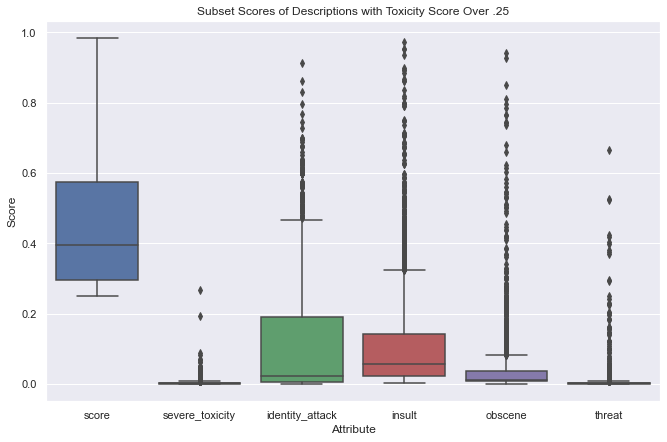

In [123]:
ax = sns.boxplot(data=final_desc)
ax.set(xlabel='Attribute', ylabel='Score')
ax.set(title='Subset Scores of Descriptions with Toxicity Score Over .25')
sns.set(rc={'figure.figsize':(11,7)})
sns.set(font_scale=1)


In [130]:
subdf = pd.read_csv('/Users/hgardner/Desktop/toxicity/data/parsed data files/raw_subject.csv')

In [131]:
desc_sub = final_desc.merge(subdf, on='bibid', how='left')

In [132]:
desc_sub.head()

,bibid,description_x,score,severe_toxicity,identity_attack,insult,obscene,threat,subject
0,(CKB)3710000000420489,"Do you ever find yourself thinking, how could ...",0.983634,0.007580,0.010585,0.952982,0.763423,0.001579,"Criticism, Personal."
1,(CKB)1000000000380783,Praise for Hoover’s bestseller How to Work for...,0.981940,0.000850,0.001173,0.973171,0.071720,0.001047,Managing your boss.
2,(YBPDDA)ebc1177199,Uncrossable rivers! Hospitable nomads! Rabid d...,0.980722,0.002542,0.008085,0.952237,0.265998,0.001322,Mountain biking
3,(OCoLC)ocm37115033,Sleuth Hap Collins and his black sidekick go a...,0.978410,0.029838,0.911426,0.461446,0.160124,0.050536,"Collins, Hap (Fictitious character)"
4,(CKB)3790000000019336,"École de merde, élèves de merde, profs de ...",0.972781,0.017700,0.008512,0.073015,0.063699,0.002601,Teachers
